# 데이터 로드

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
DATA_PATH = "./data/titanic/"

df = pd.read_csv(DATA_PATH+'train.csv')
SEED = 42

In [4]:
df.shape, df.columns

((891, 12),
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

In [5]:
df.columns = [col.lower() for col in df.columns]
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

# 데이터 확인

In [6]:
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 타겟 데이터 확인

In [7]:
new_survived = pd.Categorical(df["survived"])
new_survived[:5]

[0, 1, 1, 1, 0]
Categories (2, int64): [0, 1]

In [9]:
new_survived = pd.Categorical(df["survived"])
new = new_survived.rename_categories(["died", "Survived"])
print(new_survived[:5])
new_survived.describe()

[0, 1, 1, 1, 0]
Categories (2, int64): [0, 1]


,counts,freqs
categories,,
0,549,0.616162
1,342,0.383838


In [10]:
!pip install scikit-learn

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
X = df.drop('survived', axis=1)
y = df['survived']

X_tr, X_te, y_tr, y_te = train_test_split(X, y, random_state=SEED, test_size = 0.2)
X_tr = X_tr.reset_index(drop=True)
X_te = X_te.reset_index(drop=True)

X_tr.shape, X_te.shape

((712, 11), (179, 11))

In [15]:
new_survived = pd.Categorical(y_tr)
new_survived = new_survived.rename_categories(["Died", "Survived"])
print(new_survived[:5])
new_survived.describe()

['Died', 'Died', 'Died', 'Died', 'Died']
Categories (2, object): ['Died', 'Survived']


,counts,freqs
categories,,
Died,444,0.623596
Survived,268,0.376404


# Data Cleaning

#### 완결성

결측값을 가능하면 제거해야 합니다.

#### 유일성

중복 데이터가 있으면 안됩니다. 

# 중복 데이터 처리

In [17]:
#중복 제거
print(f'before: {df.shape}')
df.drop_duplicates(keep='first', inplace=True, ignore_index=True)
# df.drop_duplicates(keep='first', inplace=False, ignore_index=True) : duplicate 문이 중복 데이터 삭제
print(f'after: {df.shape}')

before: (891, 12)
after: (891, 12)


In [19]:
df['passengerid'].nunique(), df.shape[0]

(891, 891)

# 결측치

# 결측치 유형 파악

#### 완전 무작위 결측

#### 무작위 결측

#### 비무작위 결측

# 결측치 탐색

In [23]:
(X_tr.isnull().sum() / X_tr.shape[0] * 100).round(4).sort_values(ascending=False) # 각 컬럼별 결측치 비율

cabin          77.6685
age            19.6629
embarked        0.2809
passengerid     0.0000
pclass          0.0000
name            0.0000
sex             0.0000
sibsp           0.0000
parch           0.0000
ticket          0.0000
fare            0.0000
dtype: float64

In [24]:
X_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  712 non-null    int64  
 1   pclass       712 non-null    int64  
 2   name         712 non-null    object 
 3   sex          712 non-null    object 
 4   age          572 non-null    float64
 5   sibsp        712 non-null    int64  
 6   parch        712 non-null    int64  
 7   ticket       712 non-null    object 
 8   fare         712 non-null    float64
 9   cabin        159 non-null    object 
 10  embarked     710 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 61.3+ KB


<AxesSubplot: >

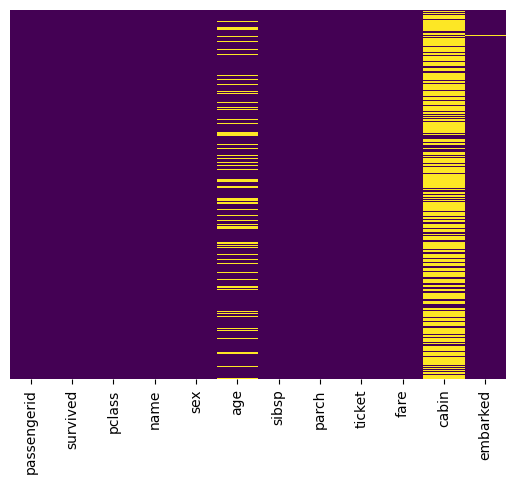

In [26]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis') # 결측치 위치 체크

Text(0.5, 1.0, 'Total Missing Value(%)')

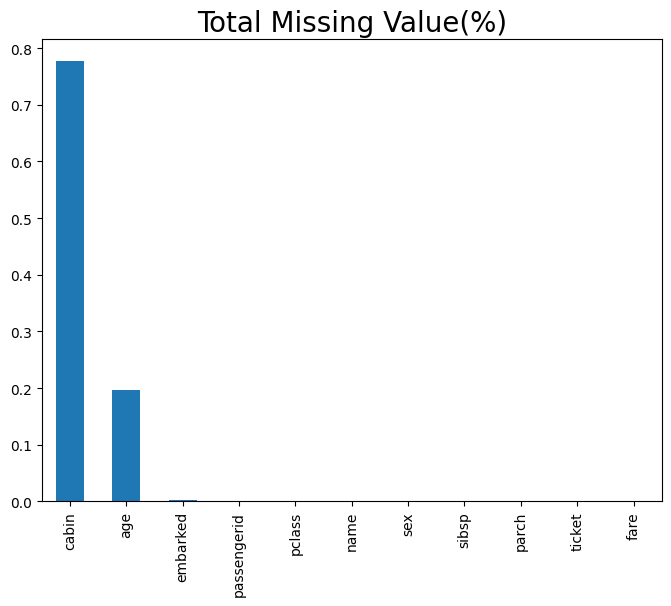

In [27]:
total = X_tr.isnull().sum().sort_values(ascending=False) # 토탈 결측치
percent = (X_tr.isnull().sum()/X_tr.isnull().count()).sort_values(ascending=False) # 결측치 비율
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # total, 비율 합산
percent_data = percent.head(20) # 비율 상위 20개
percent_data.plot(kind="bar", figsize = (8, 6), fontsize = 10) # 데이터 표시

plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Value(%)", fontsize = 20)

In [29]:
X_tr['hasCabin'] = X_tr['cabin'].isnull().apply(lambda x: 0 if x == True else 1) # Cabin이 있느냐 없느냐
X_tr['hasAge'] = X_tr['age'].isnull().apply(lambda x: 0 if x == True else 1) # Age가 있느냐 없느냐

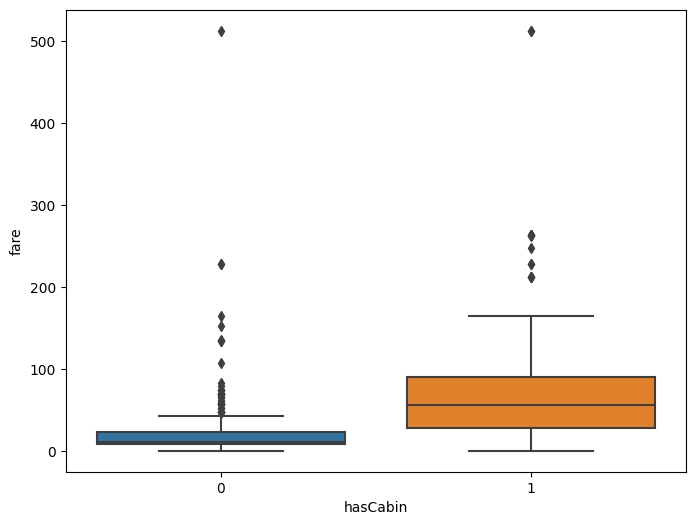

In [30]:
data = pd.concat([X_tr['fare'], X_tr['hasCabin']], axis=1) 
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='hasCabin', y='fare', data=data) # 박스로 표시

In [31]:
!pip install statmodels

ERROR: Could not find a version that satisfies the requirement statmodels (from versions: none)
ERROR: No matching distribution found for statmodels


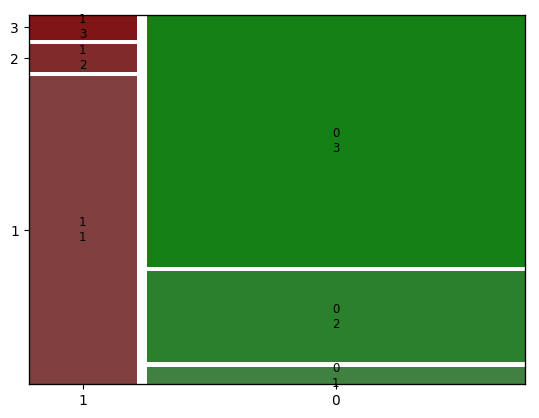

In [32]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(X_tr, ['hasCabin','pclass'], gap=0.02) # 모자이크, gap= ?
plt.show()

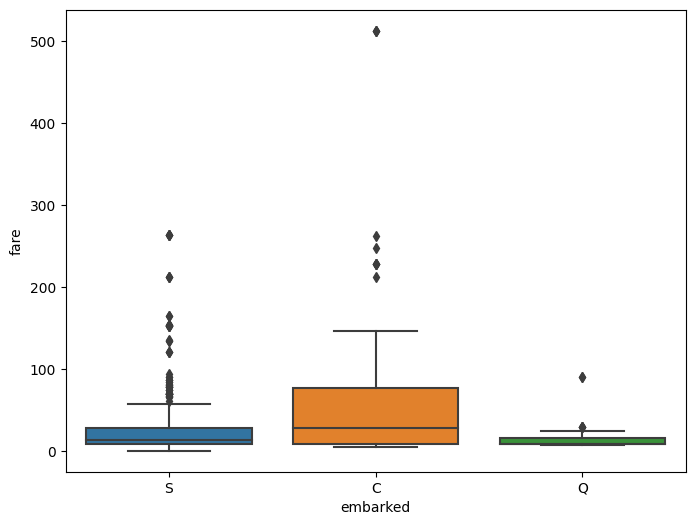

In [33]:
data = pd.concat([X_tr['fare'], X_tr['embarked']], axis=1) #S, C, Q 당 급여의 양
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='embarked', y="fare", data=data) # C > S > Q 순으로 fare가 높다

<AxesSubplot: xlabel='embarked', ylabel='fare'>

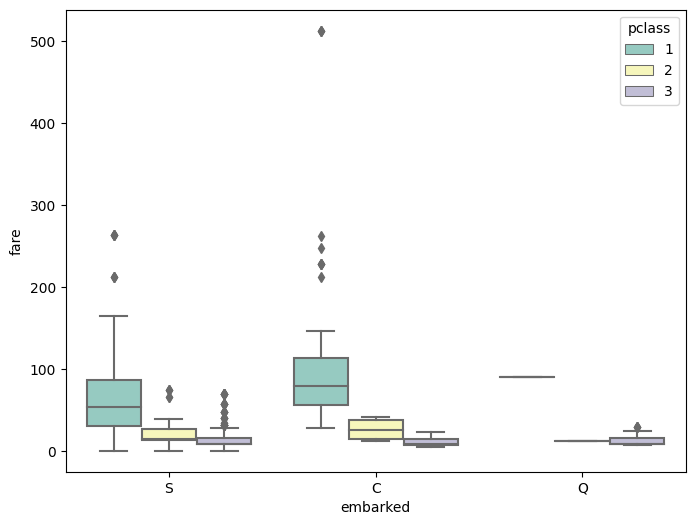

In [37]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="embarked", y="fare", hue="pclass",
            data = X_tr, palette="Set3")

In [38]:
print(f'before: {X_tr.shape} / isnull().sum(): {X_tr.isnull().sum().sum()}')
# 결측치가 있는 행 제거 : X_tr.dropna(axis=0)
df_droprows = X_tr.dropna(axis=0)
print(f'after: {df_droprows.shape} / isnull().sum(): {df_droprows.isnull().sum().sum()}')

before: (712, 13) / isnull().sum(): 695
after: (143, 13) / isnull().sum(): 0


In [39]:
print(f'before: {X_tr.shape} / isnull().sum(): {X_tr.isnull().sum().sum()}')
# 결측치가 있는 열 제거 : X_tr.dropna(axis=1)
df_dropcols = df.dropna(axis=1)
print(f'after: {df_dropcols.shape} / isnull().sum(): {df_dropcols.isnull().sum().sum()}')

before: (712, 13) / isnull().sum(): 695
after: (891, 9) / isnull().sum(): 0


# 수치형 치환

In [41]:
X_tr['age_mean'] = X_tr['age'].fillna(X_tr['age'].mean())
X_tr['age_median'] = X_tr['age'].fillna(X_tr['age'].median())

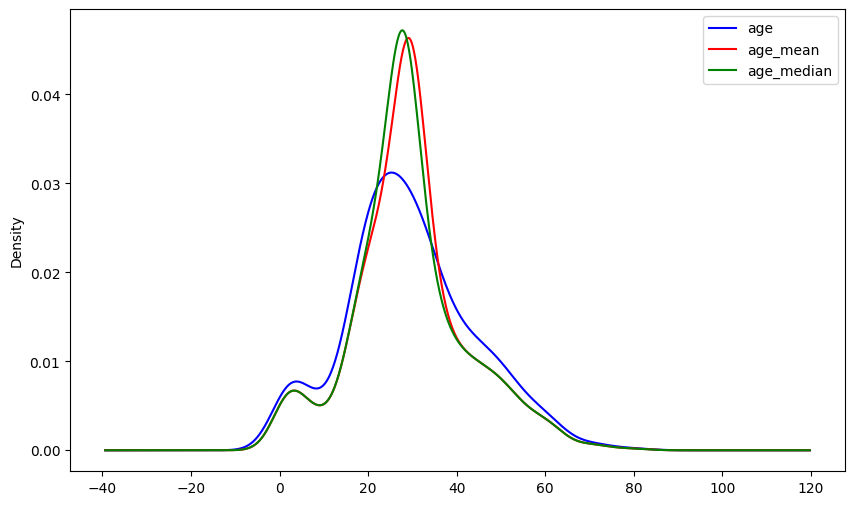

In [43]:
fig, ax = plt.subplots(figsize=(10, 6))

X_tr['age'].plot(kind='kde', ax=ax, color='blue')
X_tr['age_mean'].plot(kind='kde', ax=ax, color='red')
X_tr['age_median'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [ ]:
X_te['age_mean'] = X_te['age'].fillna(X_tr['age'].mean())
X_te['age_median'] = X_te['age'].fillna(X_tr['age'].median())

# 분포 시각화
fig, ax = plt.subplots(figsize=(10,6))

X_te['age'].plot(kind='kde', ax=ax, color='blue')
X_te['age_mean'].plot(kind='kde', ax=ax, color='red')
X_te['age_median'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [44]:
X_tr['age_random'] = X_tr['age']

random_sampling = (X_tr['age'].dropna().sample(X_tr['age'].isnull().sum()))
random_sampling.index = X_tr[lambda x: x['age'].isnull()].index

X_tr.loc[X_tr['age'].isnull(), 'age_random'] = random_sampling

X_tr[['age', 'age_random']].isnull().sum()

age           140
age_random      0
dtype: int64

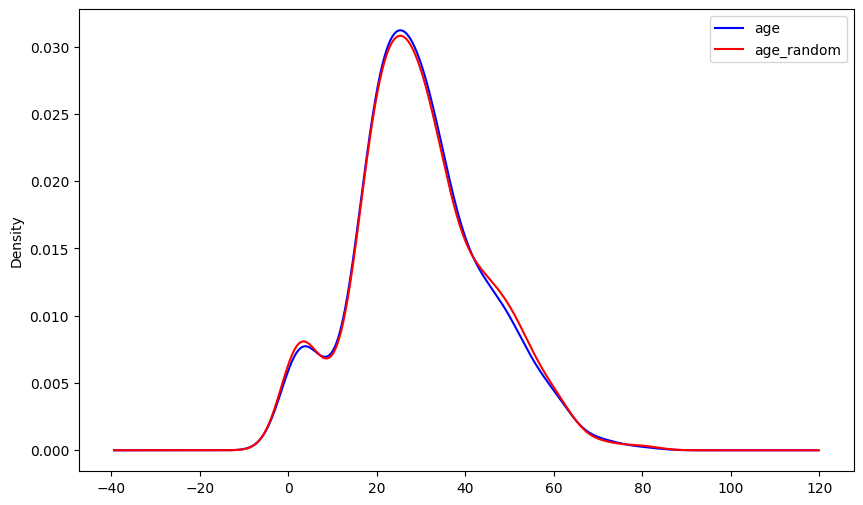

In [46]:
fig, ax = plt.subplots(figsize=(10, 6))

X_tr['age'].plot(kind='kde', ax=ax, color='blue')
X_tr['age_random'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [47]:
# 최빈값
embarked_mode = X_tr['embarked'].mode().values[0] # mode : 제일 많이 나온 값

# NA imputation
X_tr['embarked_filled'] = X_tr['embarked'].fillna(embarked_mode)
X_te['embarked_filled'] = X_te['embarked'].fillna(embarked_mode)

# 확인
print(X_tr[['embarked', 'embarked_filled']].isnull().sum())
print('-'*50)
print(X_te[['embarked', 'embarked_filled']].isnull().sum())

embarked           2
embarked_filled    0
dtype: int64
--------------------------------------------------
embarked           0
embarked_filled    0
dtype: int64


In [51]:
from sklearn.impute import SimpleImputer
# strategy : mean, median, most_frequent
imputer = SimpleImputer(strategy="mean")

X_tr['age_simple_mean'] = imputer.fit_transform(X_tr[["age"]])
# imputer.fit(X_tr[["age"]]) : age의 평균값
# X_tr['age_simple_mean'] = imputer.fit_transform(X_tr[["age"]]) : null에 평균값 적용(나와 달리 imputer.transform을 쓴다)
imputer.fit(X_tr[["age"]])

X_te['age_simple_mean'] = imputer.fit_transform(X_te[["age"]])

X_tr[['age', 'age_simple_mean']].isnull().sum()

age                140
age_simple_mean      0
dtype: int64

# KNNimputer : 모델 기반

In [53]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)

X_tr['age_iter_none'] = imputer.fit_transform(X_tr[['age']])
X_te['age_iter_none'] = imputer.transform(X_te[['age']])

X_tr[['age', 'age_iter_none']].isnull().sum()

age              140
age_iter_none      0
dtype: int64

# IterativeImputer : 모델 기반

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)

X_tr['age_iter_none'] = imputer.fit_transform(X_tr[['age']])
X_te['age_iter_none'] = imputer.transform(X_te[['age']])

X_tr[['age', 'age_iter_none']].isnull().sum()

# 비대칭 데이터

### 왜도, 첨도

In [54]:
df['fare'].skew() #왜도

4.787316519674893

In [55]:
df['fare'].kurt() # 첨도

33.39814088089868

In [ ]:
sns.displot(df["fare"], color="b", label="Skewness : %.2f"%(df["fare"].skew())) # 수치상으로 왜도(뾰족한 정도)

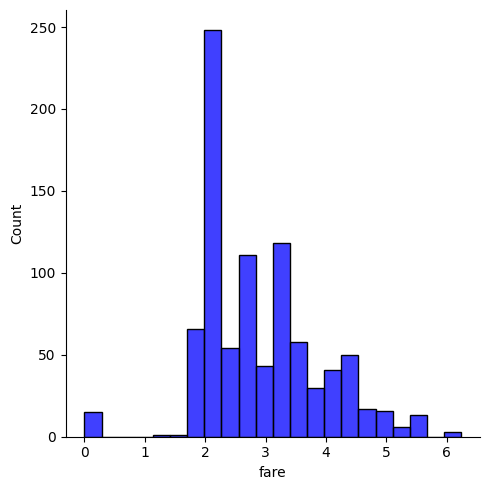

In [57]:
df["fare"] = df["fare"].map(lambda i : np.log(i) if i > 0 else 0) # 비정형 데이터 ~~ 로그값으로 처리
sns.displot(df["fare"], color="b", label="Skewness : %.2f"%(df["fare"].skew())) 

In [59]:
df['fare'].skew(), df['fare'].kurt()

(0.44310881405404506, 0.641225603709215)

# 이상치 확인

In [60]:
df['age'].skew(), df['age'].kurt()

(0.38910778230082704, 0.17827415364210353)

<AxesSubplot: ylabel='age'>

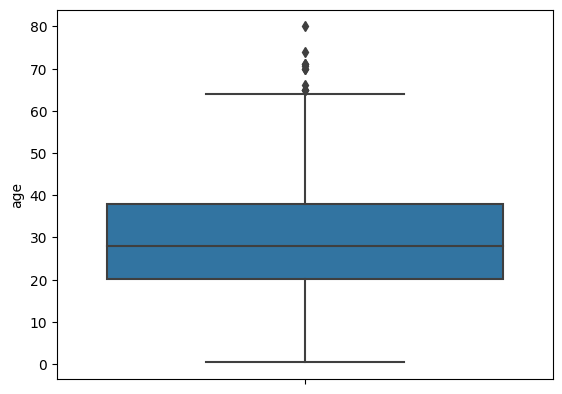

In [61]:
sns.boxplot(y=df['age'], data=df)

<AxesSubplot: xlabel='survived', ylabel='age'>

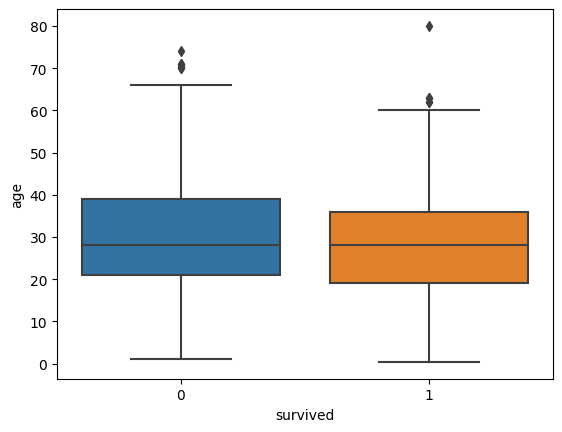

In [62]:
sns.boxplot(x=df['survived'], y=df['age'], data=df)

In [63]:
df.groupby(['survived'])['age'].quantile([0.25, 0.75]) #분위수 계산(상위 25%, 상위 75%)

survived      
0         0.25    21.0
          0.75    39.0
1         0.25    19.0
          0.75    36.0
Name: age, dtype: float64

In [64]:
df['age'].quantile([0.25, 0.5, 0.75]) 

0.25    20.125
0.50    28.000
0.75    38.000
Name: age, dtype: float64

In [65]:
IQR = df['age'].quantile([0.25, 0.75]).values[1] - df['age'].quantile([0.25, 0.75]).values[0] #상위 75% - 상위 25% = IQR
Upper_boundary = df['age'].median() + 1.5*IQR # 보다 커질 시 이상치
Lower_boundary = df['age'].median() - 1.5*IQR # 보다 작을 시 이상치

In [66]:
# 이상치 처리의 경우 필수가 아닌 선택. 알아놓으면 도움이 된다.
cond1 = df['age'] > Upper_boundary #높은 이상치
cond2 = df['age'] < Lower_boundary #낮은 이상치

cond = cond1 | cond2 #두 이상치 포함 
outlier = df.loc[cond] 
print(outlier.shape, df.shape)
outlier.head() #이상치에 해당하는 값들

(56, 12) (891, 12)


,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,3.279030,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,2.772589,NaN,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.00,0,0,C.A. 24579,2.351375,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.00,0,1,113509,4.126799,B30,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,3.367296,NaN,S


# 이상치 처리

In [67]:
df['age'] = df['age'].map(lambda x:Upper_boundary if x > Upper_boundary else x) # 이상치의 값 : 전부 같은 값으로 고침
df['age'] = df['age'].map(lambda x:Lower_boundary if x < Lower_boundary else x)

In [68]:
cond1 = df['age'] > Upper_boundary # 이상치의 값이 없어짐
cond2 = df['age'] < Lower_boundary

cond = cond1 | cond2
outlier = df.loc[cond]
print(outlier.shape, df.shape)
outlier.head()

(0, 12) (891, 12)


,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked


<AxesSubplot: ylabel='age'>

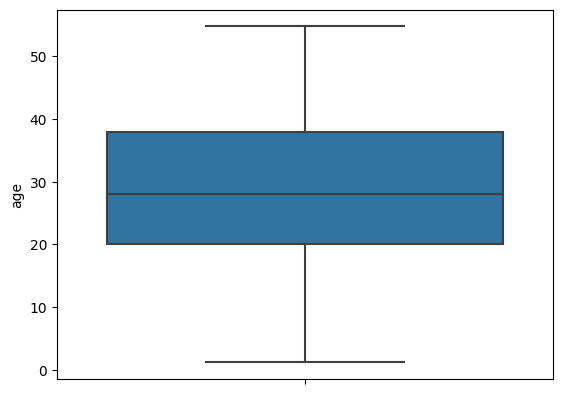

In [69]:
sns.boxplot(y=df['age'], data=df)

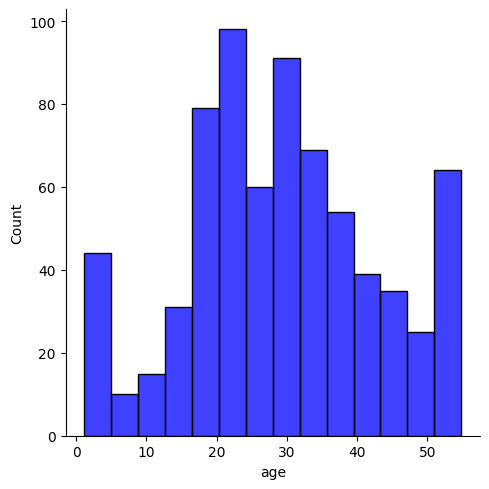

In [70]:
sns.displot(df["age"], color="b", label="Skewness : %.2f"%(df["age"].skew())) # 54 이상의 값, 1 이하의 값이 사라짐

<AxesSubplot: xlabel='survived', ylabel='age'>

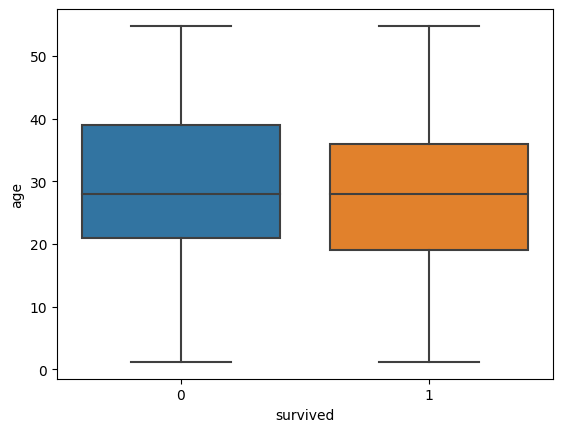

In [71]:
sns.boxplot(x=df['survived'], y=df['age'], data=df)